<a href="https://colab.research.google.com/github/corinaccqf/unsupervised-learning/blob/main/Unsupervised_learning_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Unsupervised learning assignment**

El aprendizaje no supervisado es uno de los principales paradigmas de aprendizaje en el aprendizaje automático. Permite a los científicos de datos comprender los patrones y las relaciones en los datos sin la guía de verdades fundamentales en los datos.

En las décadas anteriores, muchos de los avances en el aprendizaje automático provinieron del frente del aprendizaje supervisado. Pero el aprendizaje no supervisado sigue siendo una de las direcciones más prometedoras que pueden utilizar la ciencia de datos y la inteligencia artificial modernas. Aunque vivimos en un mundo con abundantes cantidades de datos, etiquetar estos datos con verdades básicas no es una tarea fácil; a menudo requiere mano de obra humana costosa y desafiante. El aprendizaje no supervisado es de primordial importancia para la ciencia de datos porque tiene el potencial de explotar enormes cantidades de datos sin necesidad de anotaciones.

Elegirás tu propia pregunta de investigación o elegirás de la lista a continuación:

## **¿Cómo se pueden utilizar técnicas de agrupación en clústeres para lograr lo siguiente?**

1.     Netflix quiere identificar películas similares según sus características.

2.     Una empresa quiere segmentar a sus clientes.
3.     Su startup está creando un nuevo e innovador software de correo electrónico. ¿Cómo puedes ayudarlos a crear un filtro de spam eficaz?

3.     Su director de marketing quiere saber cuánto tráfico del sitio web se debe al spam y los bots en comparación con los clientes reales. ¿Cómo se puede agrupar el tráfico?

4.     A su cónyuge le encanta el béisbol de fantasía y tiene algunos jugadores favoritos. ¿Cómo puedes ayudarlos a elegir a quién tener en su equipo?

5.    El equipo de seguridad de un banco quiere identificar actividades transaccionales fraudulentas.

Una vez que haya seleccionado la pregunta de investigación, haga lo siguiente:

1.     **Salga y encuentre un conjunto de datos de interés.**  Podría ser uno que le ayude a trabajar en una de las preguntas de investigación recomendadas, o podría ser cualquier otro conjunto de datos que aborde su propia pregunta de aprendizaje no supervisado.


2.       **Explora los datos.**  Conozca los datos. Dedique mucho tiempo a repasar sus peculiaridades. Debe comprender cómo se recopiló, qué contiene y cómo se ven las variables.


3.       **Pruebe varios enfoques diferentes.**  Trabaja realmente para ajustar una variedad de modelos antes de elegir el que consideres que tiene mejor desempeño.
Tenga en cuenta las siguientes consideraciones: ¿Cómo se comparan la agrupación y el modelado? ¿Cuáles son las ventajas de cada uno? ¿Por qué querrías usar uno sobre el otro?

Envíe un Jupyter Notebook que cuente una historia convincente sobre sus datos y hallazgos.

In [1]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,31,

Este conjunto de datos se centra en información demográfica y comportamiento de compra de clientes en un centro comercial. Puede ser útil para la segmentación de clientes y la identificación de patrones de compra.

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
Mall_Customers = pd.read_csv("Mall_Customers.csv")

In [4]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


*   CustomerID: Identificador del cliente.
*   Gender: Género del cliente (puede ser "Male" o "Female").
*   Age: Edad del cliente.
*   Annual Income (k$): Ingresos anuales del cliente en miles de dólares.
*   Spending Score (1-100): Puntuación de gasto del cliente, que podría ser asignada por el centro comercial (en una escala del 1 al 100, donde 100 indica un mayor gasto).

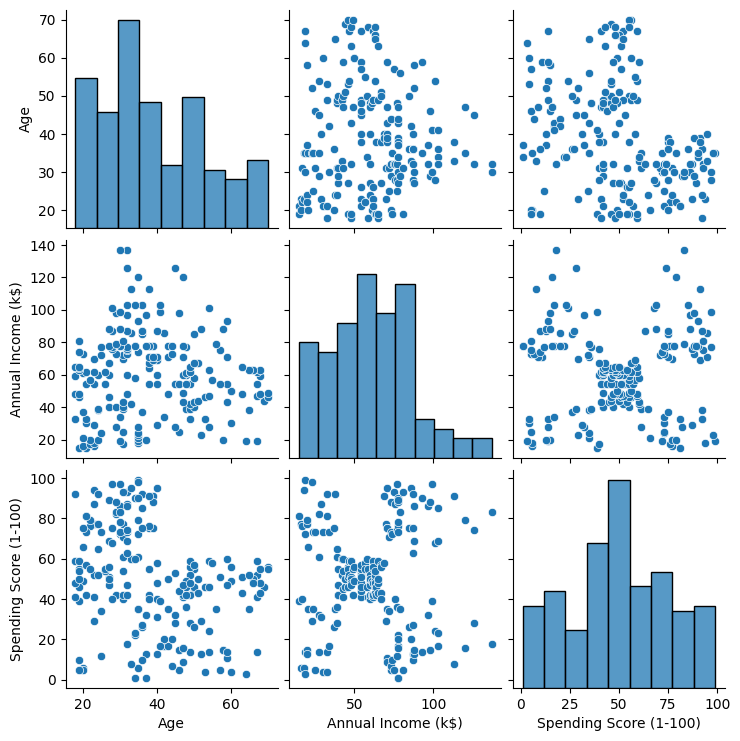

In [7]:
# Visualizaciones exploratorias
sns.pairplot(Mall_Customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [8]:
# Preprocesamiento de datos
X = Mall_Customers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Modelado de clustering (k-means)
kmeans = KMeans(n_clusters=3, random_state=42)
Mall_Customers['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


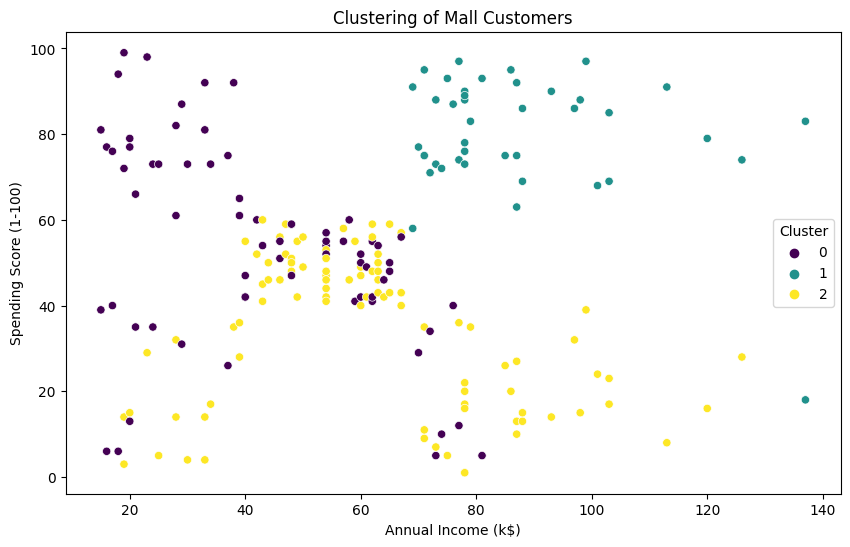

In [10]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=Mall_Customers, palette='viridis')
plt.title('Clustering of Mall Customers')
plt.show()


En el grafico muestra la distribución de clientes en función de sus ingresos anuales y puntuación de gasto

In [11]:
# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
Mall_Customers['PCA1'] = X_pca[:, 0]
Mall_Customers['PCA2'] = X_pca[:, 1]

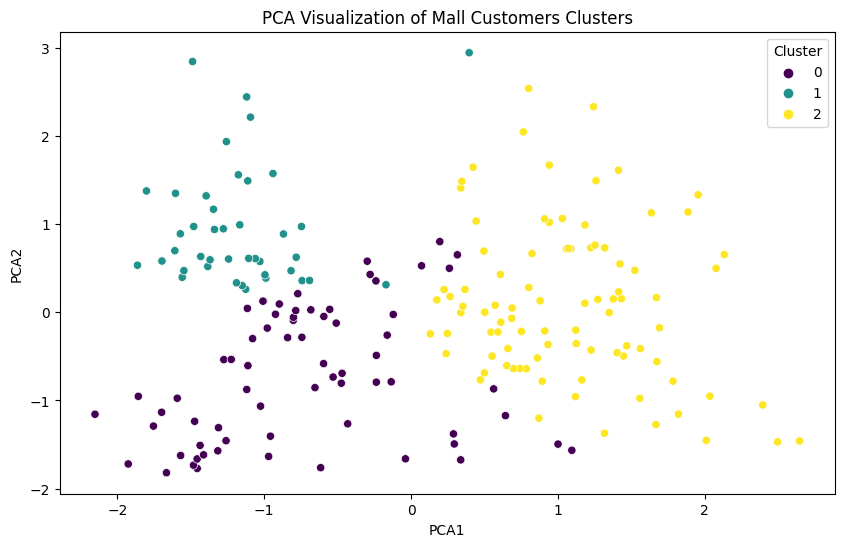

In [12]:
# Visualización de resultados de PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=Mall_Customers, palette='viridis')
plt.title('PCA Visualization of Mall Customers Clusters')
plt.show()


en el grafico se observa la agrupación de clientes del  centro comercial basado en  (PCA). El PCA se ha utilizado para reducir la dimensionalidad del conjunto de datos original, que incluye variables como género, edad, ingresos anuales y puntuación de gasto, estos clientes han sido divididos en tres clústeres distintos, lo que indica que hay patrones de comportamiento de compra que agrupan a ciertos clientes juntos.
